In [126]:
import pandas as pd
import sys
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score,train_test_split,ShuffleSplit
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer
import hmm

    # load the data from source.csv
data = pd.read_csv("source.csv")
data = data[[' timestamp', ' success', ' gaze_0_x',
                     ' gaze_0_y',' gaze_0_z',
                     ' gaze_1_x', ' gaze_1_y',
                     ' gaze_1_z',' eye_lmk_X_25',' eye_lmk_Y_25',' eye_lmk_Z_25',' eye_lmk_X_21',' eye_lmk_Y_21',' eye_lmk_Z_21', ' eye_lmk_X_27',' eye_lmk_Y_27',' eye_lmk_Z_27','Annotation']]
data.columns = ['timestamp', 'success', 'gaze_0_x',
                     'gaze_0_y','gaze_0_z',
                     'gaze_1_x', 'gaze_1_y',
                     'gaze_1_z','eye_lmk_X_25','eye_lmk_Y_25','eye_lmk_Z_25','eye_lmk_X_21','eye_lmk_Y_21','eye_lmk_Z_21', 'eye_lmk_X_27','eye_lmk_Y_27','eye_lmk_Z_27','Annotation']
data = data[data['success'] == 1]
X = data[['gaze_0_x',
                     'gaze_0_y','gaze_0_z',
                     'gaze_1_x', 'gaze_1_y',
                     'gaze_1_z','eye_lmk_X_25','eye_lmk_Y_25','eye_lmk_Z_25','eye_lmk_X_21','eye_lmk_Y_21','eye_lmk_Z_21', 'eye_lmk_X_27','eye_lmk_Y_27','eye_lmk_Z_27']]
X = X.reset_index()
y = data['Annotation']
y = [int(a) for a in y]

(14289, 18)
(13003, 18)


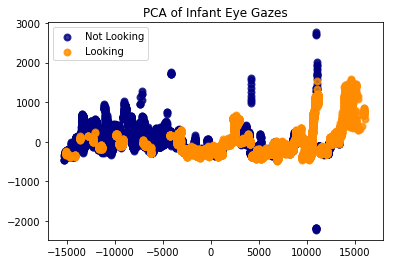

In [127]:
    print(data[data['Annotation']==0].shape)
    print(data[data['Annotation']==1].shape)
    pca = PCA(n_components=2, svd_solver='full')
    X_pca = pca.fit(X).transform(X)
#     X_pca = Normalizer().fit(X_pca).transform(X_pca)
    plt.figure()
    colors = ['navy', 'darkorange', 'green', 'red']
    target_names = ['Not Looking', 'Looking']
    target_label = [0, 1]
    lw = 2
    looking_x = np.array([a[0] for a,b in zip(X_pca, y) if b == 1])
    looking_y = np.array([a[1] for a,b in zip(X_pca, y) if b == 1])
    not_looking_x = np.array([a[0] for a,b in zip(X_pca, y) if b == 0])
    not_looking_y = np.array([a[1] for a,b in zip(X_pca, y) if b == 0]) 

    for color, i, target_name in zip(colors, target_label, target_names):
        plt.scatter([a[0] for a,b in zip(X_pca, y) if b == i], np.array([a[1] for a,b in zip(X_pca, y) if b == i]), color=color, alpha=.8, lw=lw,
                label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of Infant Eye Gazes')
    plt.show()

In [128]:
def dt_classify(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeClassifier(criterion='gini')
    dt_model.fit(X_train, y_train)
    dt_prediction = dt_model.predict(X_test)
    print("Decision Tree Classifier")
    print(classification_report(y_test, dt_prediction))
    joblib.dump(dt_model, 'dt3.joblib')
    
def lr_classify(X_train, X_test, y_train, y_test):
    lr_model = LogisticRegression(
        random_state=0, solver='sag', multi_class='multinomial').fit(X_train, y_train)
    lr_prediction = lr_model.predict(X_test)
    print(classification_report(y_test, lr_prediction))
    joblib.dump(lr_model, 'lr.joblib')

def svm_classify(X_train, X_test, y_train, y_test):
    svc_model = SVC(gamma='auto', kernel='poly',
                    coef0=0.5).fit(X_train, y_train)
    svc_prediction = svc_model.predict(X_test)
    print(classification_report(y_test, svc_prediction))
    joblib.dump(svc_model, 'svm.joblib')

def knn_classify(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    print(classification_report(y_test, knn_prediction))
    joblib.dump(knn, 'knn.joblib')

In [118]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    dt_classify(X_train, X_test, y_train, y_test)
    knn_classify(X_train, X_test, y_train, y_test)

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4718
           1       0.98      0.98      0.98      4289

   micro avg       0.98      0.98      0.98      9007
   macro avg       0.98      0.98      0.98      9007
weighted avg       0.98      0.98      0.98      9007

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4718
           1       0.99      0.99      0.99      4289

   micro avg       0.99      0.99      0.99      9007
   macro avg       0.99      0.99      0.99      9007
weighted avg       0.99      0.99      0.99      9007

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4707
           1       0.98      0.98      0.98      4300

   micro avg       0.98      0.98      0.98      9007
   macro avg       0.98      0.98      0.98      9007
weighted avg       0.98 